In [1]:
import numpy as np 
import pyjet
from pysubjet import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import mplhep as hep 
plt.style.use(hep.style.ROOT) # For now ROOT defaults to CMS

In [2]:
data=pd.read_hdf('LHColympics2020/events_anomalydetection_tiny.h5')
data

,0,1,2,3,4,5,6,7,8,9,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,0.324101,-0.361158,2.737669,0.409859,-2.429939,0.729830,0.867922,-2.267777,-1.161310,0.383031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.646304,-0.539460,-1.386258,0.471293,-1.636572,0.751657,0.453769,-1.099593,-0.393405,0.485929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.325172,-0.833948,2.404844,1.295058,-2.089618,-1.873342,0.451272,-0.101877,2.217348,0.461293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.290918,-2.200063,1.630132,0.565028,-1.714345,-2.617103,0.951042,-0.532720,2.941473,0.896248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.526330,-2.349110,-1.745532,0.542491,-2.080352,-3.044045,0.390727,-1.278563,-2.131058,2.530358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.558454,-0.667654,0.445050,0.220177,-1.109788,2.691200,0.426006,-1.355901,2.359371,0.188318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,3.224277,-2.394595,-1.716092,0.461683,-2.102307,-2.378719,0.444322,-0.673169,1.017897,0.664407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.308288,-0.381152,-2.721488,2.390583,-0.784246,-2.640125,2.609883,-0.758702,3.080750,2.774264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.195123,-2.203834,-3.064237,0.497103,-2.253029,-0.701283,0.434465,-1.692405,-2.279329,0.676338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
with cluster_events(data=data, R=1.0, ptmin=20.0, stop=1) as event:
    for N, jets, truth in event:
        
        jet_trees=decluster_jet(jets)
                
        '''
        This extracts the binary tree for each jet (i.e. declustering history):
        Each element in jet_trees list is a networkx graph object. Each node 
        of the tree we associate a pyjet 'pseudojet'representing the subjet 
        splitting j0 -> j1 j2 and a set of additional attributes if specified 
        (e.g. features like lund observables, massdrop, etc).        
        '''        
        tree=jet_trees[0]

        # list of node index:
        
        idx_nodes=list(nx.nodes(tree))
        
        # the node attributes:
        
        subjets=nx.get_node_attributes(tree,'pseudojet') # (e px, py pz)
        is_Primary_Branch=nx.get_node_attributes(tree,'primary_branch')  # True/False
        features=nx.get_node_attributes(tree,'feature') # specified by the user, else 'None'
        
        # retrieve values example:
        
        for n in idx_nodes:
            
            # print node index and subjets (i.e. the jet tree nodes) of the leading jet:
            
            print('node={}  subjet={}'.format(n,subjets[n]))
            

node=1  subjet=PseudoJet(pt=1286.728, eta=0.186, phi=-2.764, mass=106.912)
node=3  subjet=PseudoJet(pt=1.111, eta=0.216, phi=-1.766, mass=0.000)
node=2  subjet=PseudoJet(pt=1286.126, eta=0.185, phi=-2.764, mass=100.544)
node=5  subjet=PseudoJet(pt=0.324, eta=-0.361, phi=2.738, mass=-0.000)
node=4  subjet=PseudoJet(pt=1285.896, eta=0.186, phi=-2.764, mass=98.677)
node=9  subjet=PseudoJet(pt=2.313, eta=-0.295, phi=-2.491, mass=0.104)
node=8  subjet=PseudoJet(pt=1283.668, eta=0.186, phi=-2.765, mass=93.764)
node=17  subjet=PseudoJet(pt=42.563, eta=0.171, phi=-2.412, mass=5.737)
node=16  subjet=PseudoJet(pt=1243.814, eta=0.187, phi=-2.777, mass=28.246)
node=33  subjet=PseudoJet(pt=2.003, eta=0.417, phi=-2.681, mass=0.000)
node=32  subjet=PseudoJet(pt=1241.820, eta=0.186, phi=-2.777, mass=25.320)
node=35  subjet=PseudoJet(pt=17.584, eta=0.116, phi=-2.315, mass=1.218)
node=34  subjet=PseudoJet(pt=25.119, eta=0.208, phi=-2.480, mass=2.828)
node=69  subjet=PseudoJet(pt=12.351, eta=0.298, phi=-

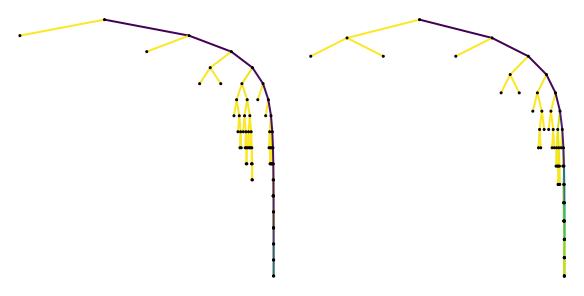

In [6]:
# visiualize jet trees from first event:
draw_event_trees(jet_trees)

'''
the tree nodes correspond to subjets splittings (j->j1 j2)
the colored edges represent the (normalized) momentum "flow"
from one subjet splitting to the next...

yellow represent soft subjeta while dark blue/green 
represent harder subjets.

'''

In [11]:
# Exctract the adjencency matrix of the jet tree:

with cluster_events(data=data, R=1.0, ptmin=20.0, stop=1) as event:
    for N, jets, truth in event:
        
        jet_trees=decluster_jet(jets)
        
        '''
        This builds the binary tree of each jet in the event.
        Each node is describes by a subjet (a pyjet 'pseudojet') and
        a set of addtional attributes. Features can be computed for 
        each node, like for example lund observables.
        
        jet_trees is a list of networkx graphs
        
        '''
        
        for jet in jet_trees:
            
            M_adj=nx.to_numpy_array(jet,weight=None)
     
    
# display adjacency matrix:

pd.DataFrame(M_adj)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Extract Lund obseravbles from the primary branching:

# define node observables:

def lund_triangle(j, j1, j2):   
    
    # j -> j1 j2  subjet splitting
    
    Delta=deltaR(j1,j2)    
    kt=j2.pt*deltaR(j1,j2)      
    return Delta, kt 

lund_0={'signal':[], 'background':[]}
lund_1={'signal':[], 'background':[]}

with cluster_events(data=data, R=1.0, ptmin=0.0) as event:
    for N, jets, truth in event:
                    
        jet_trees=decluster_jet(jets, node_feature=lund_triangle)
        
        for n,jet in enumerate(jet_trees):

            is_Features=list( nx.get_node_attributes(jet,'feature').values())          
            is_Primary_branch=list( nx.get_node_attributes(jet,'primary_branch').values()) 

            # extract primary lund plane observables:
            
            for primary, feat in zip(is_Primary_branch, is_Features):
                if primary and feat:

                    Delta=feat[0]
                    kt=feat[1]

                    if truth:
                        lund_0['signal'].append(np.log(1./Delta))
                        lund_1['signal'].append(np.log(kt))                        
                    else:
                        lund_0['background'].append(np.log(1./Delta))
                        lund_1['background'].append(np.log(kt)) 


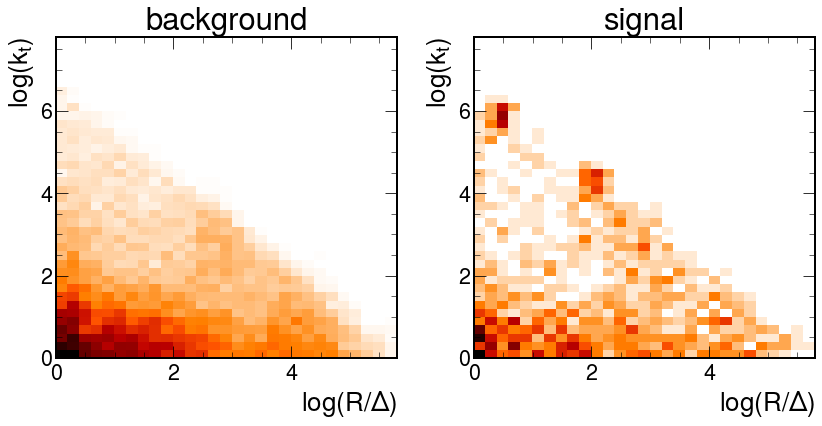

In [49]:
# Plot primary Lund planes:

xedges = np.arange(0,6,0.2)
yedges = np.arange(0,8,0.2)

fig = plt.figure(figsize=(12,6.5))

ax1 = fig.add_subplot(1,2,1)
plt.hist2d(lund_0['background'],lund_1['background'],bins=(xedges, yedges),cmap='gist_heat_r')
plt.title('background',  loc='center')
ax1.set_xlabel('$\log(R/\Delta)$')
ax1.set_ylabel('$\log(k_t)$')

ax2 = fig.add_subplot(1,2,2)
plt.hist2d(lund_0['signal'],lund_1['signal'],bins=(xedges, yedges),cmap='gist_heat_r')
plt.title('signal',  loc='center')
ax2.set_xlabel('$\log(R/\Delta)$')
ax2.set_ylabel('$\log(k_t)$')

plt.tight_layout()